---
## **Creation Standard Dataset For Train/Test the Standard SVM Classifier**
---

<font size="2">Eudald Sangenis  
Creation: 7/11/2022  
Last Update: 11/14/2024  

The objective of this file is to create the dataset based on 6 signals (3xAcc + 3xGyr) data and the label for training and testing the standard SVM Classifier.

Parameters of the Resulting Dataset:  
- 6 signals from the IMU 
- Label

Once this dataset is created the next step is to remove the bias and then train and test the standard SVM classifier.</font>

In [250]:
# 2022_03_17 - Subject I - Chico
# 2022_07_27 - Subject II - Eudald
# 2022_08_01 - Subject III - Austin
data_dataset = '2022_03_17'

---
## **<font size="5">1. Libraries</font>**
---

In [251]:
import os
import sys
import pandas as pd  
import matplotlib.pyplot as plt

# Get the current working directory
current_directory = os.getcwd()

# Get the parent directory (where the module is located)
parent_directory = os.path.dirname(current_directory)

# Append the parent directory to sys.path
sys.path.append(parent_directory)

# Now you can import the module
import signal_processing_functions as sp

---
## **<font size="5">3. Empty variables:</font>**
---

In [252]:
x_100_df = pd.DataFrame(); x_200_df = pd.DataFrame(); x_300_df = pd.DataFrame()
x_400_df = pd.DataFrame(); x_500_df = pd.DataFrame(); x_600_df = pd.DataFrame()
x_700_df = pd.DataFrame(); x_800_df = pd.DataFrame(); x_900_df = pd.DataFrame()
x_1000_df = pd.DataFrame(); x_1100_df = pd.DataFrame(); x_1200_df = pd.DataFrame()
x_1300_df = pd.DataFrame(); x_1400_df = pd.DataFrame(); x_1500_df = pd.DataFrame()
x_1600_df = pd.DataFrame(); x_1700_df = pd.DataFrame(); x_1800_df = pd.DataFrame()

X_100_df = pd.DataFrame(); X_200_df = pd.DataFrame(); X_300_df = pd.DataFrame()
X_400_df = pd.DataFrame(); X_500_df = pd.DataFrame(); X_600_df = pd.DataFrame()
X_700_df = pd.DataFrame(); X_800_df = pd.DataFrame(); X_900_df = pd.DataFrame()
X_1000_df = pd.DataFrame(); X_1100_df = pd.DataFrame(); X_1200_df = pd.DataFrame()
X_1300_df = pd.DataFrame(); X_1400_df = pd.DataFrame(); X_1500_df = pd.DataFrame()
X_1600_df = pd.DataFrame(); X_1700_df = pd.DataFrame(); X_1800_df = pd.DataFrame()

---
## **<font size="5">4. Data Handling</font>**
---

In [253]:
# 2 signals
dataset_path_lab = parent_directory+'\\2_labeled_datasets\\'+data_dataset+'\\'
# 6 signals
dataset_path_unlab = parent_directory+'\\1_unlabeled_datasets\\'+data_dataset+'\\'
# save dataset path
dataset_save = current_directory+'\\datasets\\'+data_dataset+'\\'
os.makedirs(dataset_save, exist_ok=True)

In [254]:
# Labeled datasets
dataset_filenames = ['x_100_df.csv',  'x_200_df.csv',  'x_300_df.csv',  'x_400_df.csv',  'x_500_df.csv',  'x_600_df.csv',
                     'x_700_df.csv',  'x_800_df.csv',  'x_900_df.csv',  'x_1000_df.csv', 'x_1100_df.csv', 'x_1200_df.csv',
                     'x_1300_df.csv', 'x_1400_df.csv', 'x_1500_df.csv', 'x_1600_df.csv', 'x_1700_df.csv', 'x_1800_df.csv']
datframes_names = [os.path.join(dataset_path_lab, filename) for filename in dataset_filenames]
x_df_lst = [pd.read_csv(name) for name in datframes_names]

# Unlabeled datasets
experiment_names = [('exp100_VN', 'walk 60 steps/s'), ('exp200_VN', 'walk 60 steps/s'),
                    ('exp300_VN', 'walk 90 steps/s'), ('exp400_VN', 'walk 90 steps/s'),
                    ('exp500_VN', 'jog 120 steps/s'), ('exp600_VN', 'jog 120 steps/s'),
                    ('exp700_VN', 'run 150 steps/s'), ('exp800_VN', 'run 150 steps/s'),
                    ('exp900_VN', 'sprint 180 steps/s'), ('exp1000_VN', 'sprint 180 steps/s'),
                    ('exp1100_VN', 'walk backward 60 steps/s'), ('exp1200_VN', 'walk backward 60 steps/s'),
                    ('exp1300_VN', 'jog backward 90 steps/s'),  ('exp1400_VN', 'jog backward 90 steps/s'),
                    ('exp1500_VN', 'side step right 90 steps/s'), ('exp1600_VN', 'side step right 90 steps/s'),
                    ('exp1700_VN', 'side step right 90 steps/s'), ('exp1800_VN', 'side step right 90 steps/s')]

data_folder = os.path.join(parent_directory, '1_unlabeled_datasets', data_dataset)
X_df_lst = [sp.mat2pandas(data_folder + os.sep, exp_name) for exp_name, _ in experiment_names]

In [255]:
for i in range(0,len(x_df_lst)):
    x = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800]
    exec(f'x_{x[i]}_df = x_df_lst[i]')

for i in range(0,len(X_df_lst)):
    x = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800]
    exec(f'X_{x[i]}_df = X_df_lst[i]')

print(x_100_df.shape, X_100_df.shape)

(57816, 4) (57865, 7)


In [256]:
c = ['timestamp','index']
X_100_df = X_100_df.drop(X_100_df.index[:49]).reset_index().drop(columns=c);    X_200_df = X_200_df.drop(X_200_df.index[:49]).reset_index().drop(columns=c)
X_300_df = X_300_df.drop(X_300_df.index[:49]).reset_index().drop(columns=c);    X_400_df = X_400_df.drop(X_400_df.index[:49]).reset_index().drop(columns=c)
X_500_df = X_500_df.drop(X_500_df.index[:49]).reset_index().drop(columns=c);    X_600_df = X_600_df.drop(X_600_df.index[:49]).reset_index().drop(columns=c)
X_700_df = X_700_df.drop(X_700_df.index[:49]).reset_index().drop(columns=c);    X_800_df = X_800_df.drop(X_800_df.index[:49]).reset_index().drop(columns=c)
X_900_df = X_900_df.drop(X_900_df.index[:49]).reset_index().drop(columns=c);    X_1000_df = X_1000_df.drop(X_1000_df.index[:49]).reset_index().drop(columns=c)
X_1100_df = X_1100_df.drop(X_1100_df.index[:49]).reset_index().drop(columns=c); X_1200_df = X_1200_df.drop(X_1200_df.index[:49]).reset_index().drop(columns=c)
X_1300_df = X_1300_df.drop(X_1300_df.index[:49]).reset_index().drop(columns=c); X_1400_df = X_1400_df.drop(X_1400_df.index[:49]).reset_index().drop(columns=c)
X_1500_df = X_1500_df.drop(X_1500_df.index[:49]).reset_index().drop(columns=c); X_1600_df = X_1600_df.drop(X_1600_df.index[:49]).reset_index().drop(columns=c)
X_1700_df = X_1700_df.drop(X_1700_df.index[:49]).reset_index().drop(columns=c); X_1800_df = X_1800_df.drop(X_1800_df.index[:49]).reset_index().drop(columns=c)

X_100_df['label'] = x_100_df['label'];   X_200_df['label'] = x_200_df['label']
X_300_df['label'] = x_300_df['label'];   X_400_df['label'] = x_400_df['label']
X_500_df['label'] = x_500_df['label'];   X_600_df['label'] = x_600_df['label']
X_700_df['label'] = x_700_df['label'];   X_800_df['label'] = x_800_df['label']
X_900_df['label'] = x_900_df['label'];   X_1000_df['label'] = x_1000_df['label']
X_1100_df['label'] = x_1100_df['label']; X_1200_df['label'] = x_1200_df['label']
X_1300_df['label'] = x_1300_df['label']; X_1400_df['label'] = x_1400_df['label']
X_1500_df['label'] = x_1500_df['label']; X_1600_df['label'] = x_1600_df['label']
X_1700_df['label'] = x_1700_df['label']; X_1800_df['label'] = x_1800_df['label']

del x_100_df,x_200_df,x_300_df,x_400_df,x_500_df,x_600_df,x_700_df,x_800_df,x_900_df,x_1000_df,x_1100_df,x_1200_df,x_1300_df,x_1400_df,x_1500_df,x_1600_df,x_1700_df,x_1800_df

In [257]:
X_train = pd.concat([X_100_df, X_300_df, X_500_df, X_700_df, X_900_df,
                        X_1100_df, X_1300_df, X_1500_df, X_1700_df], ignore_index = True)
X_train

,acc1,acc2,acc3,gyro1,gyro2,gyro3,label
0,0.049480,0.020245,-0.966540,0.008045,0.002663,0.020730,ZUPT
1,0.050344,0.019859,-0.965713,0.007756,0.003090,0.020838,ZUPT
2,0.049442,0.020100,-0.965527,0.007091,0.003318,0.020846,ZUPT
3,0.049006,0.019358,-0.964957,0.006870,0.003169,0.020474,ZUPT
4,0.049621,0.018727,-0.964618,0.006947,0.002450,0.020432,ZUPT
...,...,...,...,...,...,...,...
309288,0.039091,0.047983,-0.969522,0.012581,0.003247,0.017652,ZUPT
309289,0.038572,0.048589,-0.967682,0.012542,0.003128,0.018178,ZUPT
309290,0.039629,0.049790,-0.966720,0.011865,0.002885,0.018885,ZUPT
309291,0.040159,0.049869,-0.968147,0.011289,0.003168,0.019393,ZUPT


In [258]:
X_test = pd.concat([X_200_df, X_400_df, X_600_df, X_800_df, X_1000_df,
                    X_1200_df, X_1400_df, X_1600_df, X_1800_df], ignore_index = True)
X_test

,acc1,acc2,acc3,gyro1,gyro2,gyro3,label
0,0.054496,0.013683,-0.966700,-0.000652,0.002393,0.021989,ZUPT
1,0.055462,0.012649,-0.967454,-0.001081,0.001593,0.021492,ZUPT
2,0.055335,0.012900,-0.966855,-0.000744,0.001462,0.021069,ZUPT
3,0.055307,0.013113,-0.966312,0.000032,0.001752,0.020630,ZUPT
4,0.056035,0.014941,-0.965898,0.000640,0.002589,0.020460,ZUPT
...,...,...,...,...,...,...,...
309976,0.047317,0.050851,-0.971659,0.009881,0.002747,0.017917,ZUPT
309977,0.046905,0.050681,-0.971899,0.009774,0.003047,0.018088,ZUPT
309978,0.046916,0.051412,-0.970592,0.009553,0.003168,0.018436,ZUPT
309979,0.046765,0.053066,-0.970593,0.009953,0.002888,0.018851,ZUPT


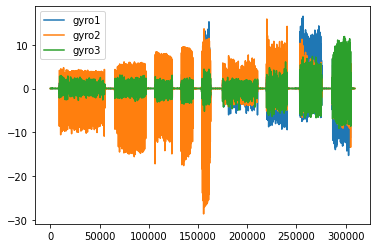

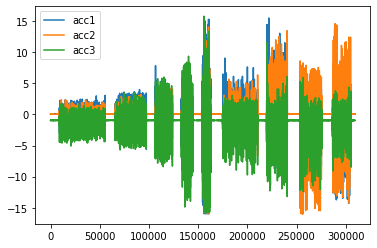

In [259]:
X_train.plot(y=['gyro1','gyro2','gyro3'], use_index=True)
X_train.plot(y=['acc1','acc2','acc3'], use_index=True)
plt.show()

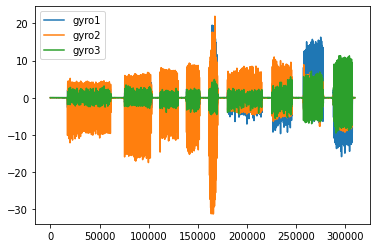

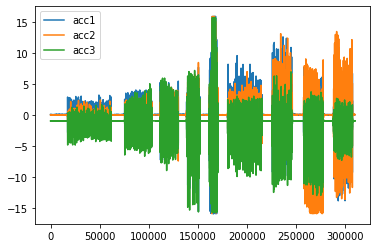

In [260]:
X_test.plot(y=['gyro1','gyro2','gyro3'], use_index=True)
X_test.plot(y=['acc1','acc2','acc3'], use_index=True)
plt.show()

In [261]:
del X_100_df,X_200_df,X_300_df,X_400_df,X_500_df,X_600_df,X_700_df,X_800_df,X_900_df,X_1000_df,X_1100_df,X_1200_df,X_1300_df,X_1400_df,X_1500_df,X_1600_df,X_1700_df,X_1800_df

Check if there are nan values:

In [262]:
print(X_train.isnull().values.any())
print(X_test.isnull().values.any())

False
False


In [263]:
X_train.to_csv(dataset_save+'6sig_train.csv', index=None, mode='a')
X_test.to_csv(dataset_save+'6sig_test.csv', index=None, mode='a') 

In [264]:
X_train.head

<bound method NDFrame.head of             acc1      acc2      acc3     gyro1     gyro2     gyro3 label
0       0.049480  0.020245 -0.966540  0.008045  0.002663  0.020730  ZUPT
1       0.050344  0.019859 -0.965713  0.007756  0.003090  0.020838  ZUPT
2       0.049442  0.020100 -0.965527  0.007091  0.003318  0.020846  ZUPT
3       0.049006  0.019358 -0.964957  0.006870  0.003169  0.020474  ZUPT
4       0.049621  0.018727 -0.964618  0.006947  0.002450  0.020432  ZUPT
...          ...       ...       ...       ...       ...       ...   ...
309288  0.039091  0.047983 -0.969522  0.012581  0.003247  0.017652  ZUPT
309289  0.038572  0.048589 -0.967682  0.012542  0.003128  0.018178  ZUPT
309290  0.039629  0.049790 -0.966720  0.011865  0.002885  0.018885  ZUPT
309291  0.040159  0.049869 -0.968147  0.011289  0.003168  0.019393  ZUPT
309292  0.039808  0.048663 -0.969034  0.011657  0.003645  0.019073  ZUPT

[309293 rows x 7 columns]>